# MAPR1492 (Partie Prof. Rignanese)

## Consignes
- Télécharger la structure du matériau attribué
- Déterminer les vecteurs de bases de ses réseaux direct et réciproque, son type de maille, son système cristallin, ainsi que son groupe ponctuel
- Montrer l'effet de trois éléments de symétrie différents (pas l'identité) chacun pour un atome différent;
- Visualiser la zone de Brillouin du matériau
- Déterminer les trois premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d'onde λ=1.54060 Å
- Télécharger la structure de bandes électroniques du matériau attribué
- Analyser celle-ci à savoir : 
    - Déterminer la bande interdite
    - Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)
    - Calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique
- Télécharger la structure de bandes de phonons du matériau attribué
- Calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin
- Télécharger la densité d'états de phonons du matériau attribué
- Calculer les températures de Debye ΘD et d'Einstein ΘE telles que les modèles correspondants minimisent l'erreur au sens des moindres carrés sur l'ensemble de la courbe de la chaleur spécifique
- Représenter les trois courbes de chaleur spécifique (celle correspondant à l'objet téléchargé ainsi que celles obtenues à partir des modèles de Debye et d'Einstein)
- Représenter les trois densités d'états de phonons correspondantes


## 0) Installation / importations

In [ ]:
# TODO: installez les bibliothèques si nécessaire (à adapter à votre environnement)
# !pip install numpy scipy matplotlib pandas pymatgen ase spglib seekpath phonopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from pathlib import Path

# Optionnel (si disponibles):
from pymatgen.core import Structure
# import spglib

# zone de brilloui
from pymatgen.symmetry.bandstructure import HighSymmKpath
from pymatgen.electronic_structure.plotter import plot_brillouin_zone

from monty.serialization import loadfn


## 1) Données d’entrée et organisation des fichiers

In [20]:
# TODO: indiquez ici où sont vos fichiers (CIF, POSCAR, etc.)
DATA_DIR = Path("data")      # mettez vos fichiers ici
OUT_DIR  = Path("outputs")   # figures / tableaux exportés
OUT_DIR.mkdir(exist_ok=True, parents=True)

material_name = "MgO"
cif_path = DATA_DIR / f"Structure_{material_name}.cif"
bandstructure_path = DATA_DIR / f"bandstructure_{material_name}.h5"
phonon_path = DATA_DIR / f"phonon_{material_name}.h5"

print("CIF:", cif_path)
print("h5:", bandstructure_path)
print("h5:", phonon_path)



CIF: data/Structure_MgO.cif
h5: data/bandstructure_MgO.h5
h5: data/phonon_MgO.h5


## 2) Télécharger / charger la structure cristalline

In [21]:
# TODO: Charger la structure (ex: CIF) avec pymatgen ou ASE
# Exemple pymatgen:
# structure = Structure.from_file(cif_path)
# structure

# Exemple ASE:
# from ase.io import read
# atoms = read(cif_path)
# atoms
structure = Structure.from_file(cif_path)
#print(structure)



## 3) Réseau direct et réciproque, maille, système cristallin, groupe ponctuel

In [22]:
# TODO:
# - Extraire les vecteurs de base du réseau direct (a1,a2,a3)
# - Calculer les vecteurs réciproques (b1,b2,b3)
# - Déduire type de maille / système cristallin / groupe ponctuel
#
# Pistes:
# - Avec spglib: identification du groupe d'espace, point group, etc.
# - Avec pymatgen: structure.get_space_group_info()
#
# À documenter proprement en texte + tableau.

from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

structure_sga = SpacegroupAnalyzer(structure)
conventional_structure = structure_sga.get_conventional_standard_structure()

reseau_direct = conventional_structure.lattice.matrix
reseau_reciproque = conventional_structure.lattice.reciprocal_lattice.matrix

print( "vecteurs du réseau direct : \n a_1 = {} \n a_2 = {} \n a_3 = {} \n".format(reseau_direct[0],reseau_direct[1],reseau_direct[2]))
print( "vecteurs du réseau réciproque : \n b_1 = {}, \n b_2 = {}, \n b_3 = {} \n".format(reseau_reciproque[0],reseau_reciproque[1],reseau_reciproque[2]))
print( "type de maille :", structure_sga.get_lattice_type())
print( "système cristallin :", structure_sga.get_crystal_system())
print( "groupe ponctuel :", structure_sga.get_point_group_symbol())

vecteurs du réseau direct : 
 a_1 = [ 1.46901045 -2.54440074  0.        ] 
 a_2 = [1.46901045 2.54440074 0.        ] 
 a_3 = [0.      0.      2.67968] 

vecteurs du réseau réciproque : 
 b_1 = [ 2.13857747 -1.23470828  0.        ], 
 b_2 = [2.13857747 1.23470828 0.        ], 
 b_3 = [0.        0.        2.3447521] 

type de maille : hexagonal
système cristallin : hexagonal
groupe ponctuel : -6m2


## 4) Symétries: effet de 3 opérations (≠ identité) sur 3 atomes

In [23]:
# TODO:
# Choisir 3 atomes (coordonnées fractionnelles) et 3 opérations de symétrie
# Appliquer chaque opération sur un atome différent et montrer le résultat (avant/après)
#
# Pistes:
# - Récupérer les opérations via spglib.get_symmetry(...) ou pymatgen SpacegroupAnalyzer
# - Présenter les résultats sous forme de tableau + schéma/figure si possible.


## 5) Zone de Brillouin (visualisation)

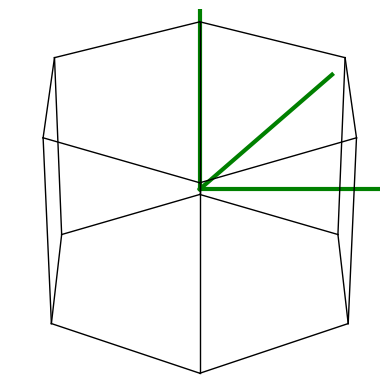

In [31]:
# TODO:
# - Construire la 1ère zone de Brillouin à partir du réseau réciproque
# - Visualiser (2D/3D) ou au minimum tracer le chemin k usuel (high-symmetry)
#
# Pistes:
# - seekpath peut fournir le chemin k standard
# - pymatgen: HighSymmKpath

# Générer le chemin haute symétrie
kpath = HighSymmKpath(structure)

# Plot de la zone de Brillouin
plot_brillouin_zone(structure.lattice.reciprocal_lattice,show=False)
plt.show()

## 6) Diffraction X: 3 premiers pics (Cu Kα, λ=1.54060 Å) + indices (hkl)

In [11]:
LAMBDA_CU_KA = 1.54060  # Å

# TODO:
# - Générer les pics (2θ, intensités) à partir de la structure
# - Identifier les 3 premiers pics et donner les hkl associés
#
# Pistes:
# - pymatgen.analysis.diffraction.xrd.XRDCalculator
#   from pymatgen.analysis.diffraction.xrd import XRDCalculator
#   xrd = XRDCalculator(wavelength=LAMBDA_CU_KA)
#   pattern = xrd.get_pattern(structure)


## 7) Bandes électroniques: téléchargement + analyse (gap, dispersion, masses effectives)

In [12]:
# TODO:
# - Charger les données de bandes (format dépend de vos sources: .dat, vasprun.xml, etc.)
# - Déterminer le gap (direct/indirect si possible)
# - Trouver la direction de plus/moins grande dispersion pour la dernière bande de valence
#   (ou première de conduction) et insérer une figure annotée (flèches)
# - Masse effective au sommet/base en supposant une dispersion parabolique:
#   m* = ħ^2 / (d^2E/dk^2)
#
# Conseil: commencez par isoler une bande près de l'extremum et faire un fit quadratique E(k).

bs = loadfn(bandstructure_path)

bande_interdite = bs.get_band_gap()
print(bande_interdite)


{'direct': False, 'transition': 'A-\\Gamma', 'energy': 3.0483000000000002}


## 8) Phonons: bandes + vitesses du son (3 branches, 3 directions)

In [13]:
# TODO:
# - Charger la dispersion phonon (q vs fréquence)
# - Pour 3 branches acoustiques et 3 directions, estimer v_s = dω/dq (proche de Γ)
#   (attention aux unités!)
#
# Conseil: faire un fit linéaire près de Γ sur ω(q) pour chaque direction/branche.

ph = loadfn(bandstructure_path)






## 9) DOS phonons et modèles Debye/Einstein: ajustement sur C_V(T)

In [ ]:
from scipy.optimize import curve_fit

# Constantes
kB = 1.380649e-23      # J/K
hbar = 1.054571817e-34 # J·s
NA = 6.02214076e23     # 1/mol
R = 8.314462618        # J/(mol·K)

# TODO: charger les données de chaleur spécifique (T, Cv) provenant du "download"
# Exemple attendu:
# T = np.array([...])
# Cv_data = np.array([...])  # en J/mol/K idéalement

def Cv_einstein(T, theta_E):
    x = theta_E / T
    ex = np.exp(x)
    return 3*R*(x**2)*ex/(ex - 1)**2

def Cv_debye(T, theta_D):
    # Intégrale de Debye: Cv = 9R (T/θD)^3 ∫0^{θD/T} (x^4 e^x)/(e^x-1)^2 dx
    # Implémentation numérique simple
    from scipy.integrate import quad
    T = np.asarray(T, dtype=float)
    out = np.zeros_like(T)
    for i, Ti in enumerate(T):
        upper = theta_D / Ti
        integrand = lambda x: (x**4*np.exp(x))/((np.exp(x)-1)**2)
        val, _ = quad(integrand, 0, upper, limit=200)
        out[i] = 9*R*(Ti/theta_D)**3 * val
    return out

# TODO: fit moindres carrés
# popt_E, _ = curve_fit(Cv_einstein, T, Cv_data, p0=[300])
# popt_D, _ = curve_fit(Cv_debye,    T, Cv_data, p0=[300])
# theta_E = popt_E[0]; theta_D = popt_D[0]
# print(theta_E, theta_D)


## 10) Figures finales: C_V(T) (données, Debye, Einstein) + 3 DOS phonons correspondantes

In [ ]:
# TODO:
# - Tracer Cv_data vs T
# - Tracer Cv_debye(T, theta_D) et Cv_einstein(T, theta_E)
# - Charger/Tracer les DOS phonons (3 courbes: brute + Debye + Einstein, selon votre consigne)
#
# Astuce: exporter les figures dans OUT_DIR pour les partager facilement.


## 11) Conclusion (résumé + points clés)

- Structure: …  
- Réseau / symétrie: …  
- XRD: …  
- Bandes électroniques: gap, dispersion, masses effectives: …  
- Phonons: vitesses du son, DOS, Θ_D, Θ_E, qualité de l’ajustement: …  
